<span style="font-size: 36px;">__Machine Learning Workshp 3 : Regression Analysis__.</span>
<br>
<br>
<div style="text-align: center;">
<span style="font-size: 22px;"> Welecome to our third workshop! </span> </div>

It consists of four tasks of advancing difficulty.
Please devote approximately 15 minutes per task Prior to each task we will discuss some theoretical aspects regarding single and multiple linear regression, polynomial regression as well as how to select the optimal regression models and perform hyperparameters tuning. We will explain the details of the Python functions and libraries that we will use.

<span style="font-size: 36px;">__Table of Contents__</span>
1. [Background: To know our data better](#Background:-To-know-our-data-better)
1. [Exercise 1](#Exercise-1:-Simple-Linear-Regression-Analysis)
1. [Background: Residuals](#Background:-Residuals)
1. [Exercise 2](#Exercise-2:-Multiple-Linear-Regression-Analysis)
1. [Background: Detect Missing Values](#Background:-Detect-Missing-Values)
1. [Background: Transformation of Categorical Variables](#Background:-Transformation-of-Categorical-Variables)
1. [Background: Scaling the data](#Background:-Scaling-the-data)
1. [References](#References)

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Background: To know our data better
Firstly, we start by importing our libraries. These are usually the following:
1. numpy
2. pandas
3. matplotlib.pyplot
4. seaborn

Then, we read the dataset using __pandas__ and do some basic explorations on it:
<br>
1. The ```df.head()``` returns the first __n rows__ for the given DataFrame(). This function is useful for __quickly testing__ if your object has the __right type of data__ in it.
<br>
1. The ```df.describe()``` generates __descriptive statistics__ for the given DataFrame. These __summarize__ the __central tendency, dispersion and shape__ of a dataset's distribution, excluding __NaN__ values.
1. The __[seaborn](https://seaborn.pydata.org/)__ is a Python data visualization library based on __matplotlib__. It provides a __high-level interface__ for drawing attractive and informative statistical graphics. Its __[User Guide](https://seaborn.pydata.org/tutorial.html)__ may be found here.
1. The __[seaborn.set_style(style,rc)](https://seaborn.pydata.org/generated/seaborn.set_style.html)__ sets the parameters that __control the general style of the plots__ such as the __background color__ and whether a __grid is enabled__ by default:
```python
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(x=["A", "B", "C"], y=[1, 3, 2])
```
1. The __[seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)__ plots univariate or bivariate distributions using kernel density estimation. A __Kernel Density Estimation (KDE)__ plot is a method for visualizing the distribution of observations in a dataset, __analogous__ to a histogram. It __represents__ the data using a __continuous probability density curve__ in __one__ or __more__ dimensions. To plot a __univariate distribution__ along the x axis e.g. does data follow normal distribution: 
```python
import seaborn as sns
tips = sns.load_dataset("tips")
sns.kdeplot(data=tips, x="total_bill")
```
To plot distributions for each column of a wide-form dataset:
```python
iris = sns.load_dataset("iris")
sns.kdeplot(data=iris)
```
To plot conditional distributions with __hue mapping__ of a second variable:
``` python
sns.kdeplot(data=tips, x="total_bill", hue="time")
```
To __"stack"__ the conditional distributions:
```python
sns.kdeplot(data=tips, x="total_bill", hue="time",multiple="stack")
```
1. The __[pandas.DataFrame.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)__ scomputes pairwise correlation of columns, excluding NA/null values. The __correlation method__ is by default the __'pearson'__ but may change either to __'kendall'__ or to __'spearman'__. It returns a __float ndarray__. It has __'1's__ along the __diagonal line__ and will be __symmetric__ regardless of the callable's behavior. In its __simplest form__ you may call it as ```df.corr()```.
1. The __[seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)__ plots rectangular data as a __color encoded matrix__. The __data parameter__ is a 2D dataset that can be coerced into an ndarray, If a __Pandas DataFrame__ is provided, the __index/column__ information will be used to __label__ the columns and rows. If __annot=True__, then write the __value__ to annotate the heatmap. The __cmap parameter__ is used to __perform the mapping__ from data values to colorspace. An example may be the following:
```python
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
```

# Exercise 1: Simple Linear Regression Analysis
In this exercise we will work the csv file 'USA_Housing.csv', which contains some factors __(independent variables)__.
These are used to predict the __dependent variable__, which is the house price. You should do the following:
1. Firstly read the dataset and import it to your Jupyter Notebook as a Pandas DataFrame. Then perform an initial checking regarding its shape and return the first 7 rows.
1. If everything is fine, then present the standard descriptive statistics. Please pay attention to the values and try to __"understand"__ your data. This is the __art of a machine learning expert__ that will guide you towards the __top of the AI scientists__!
1. Select a __predictor / independent variable__ that you think is the best one and __visualize__ it __in association with__ the dependent variable. What do you observe? Is it really a descriptive one?
1. Then verify whether the __output variable__ follows a __normal distribution__ by using the ```seaborn.kdeplot()``` function.
1. __Compute the correllation__ among all the pairs formed by the predictors and the dependent variables and visualize them through a __heatmap__.
1. Can you compare the heatmap information with your previous choice of the __best predictor__. Please revise/update your selection accordingly and perform a simple linear regression analysis with __train_test_split__.
1. Print the regression analysis coefficients.
1. Evaluate your analysis through the __Mean Absolute Error__, the __Root Mean Squared Error__ and the __Coefficient of Determination__.

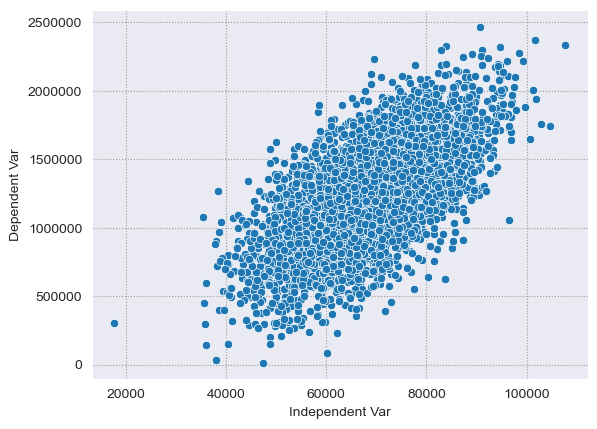

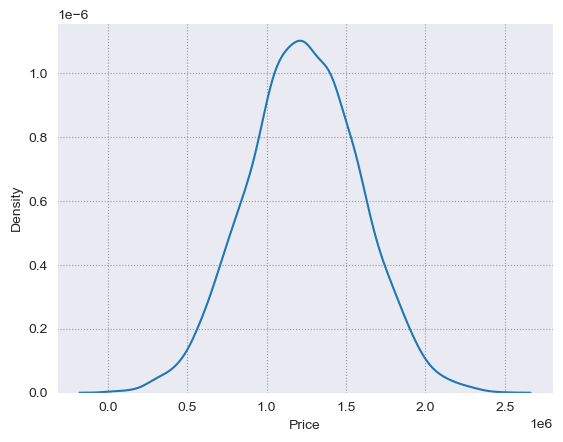

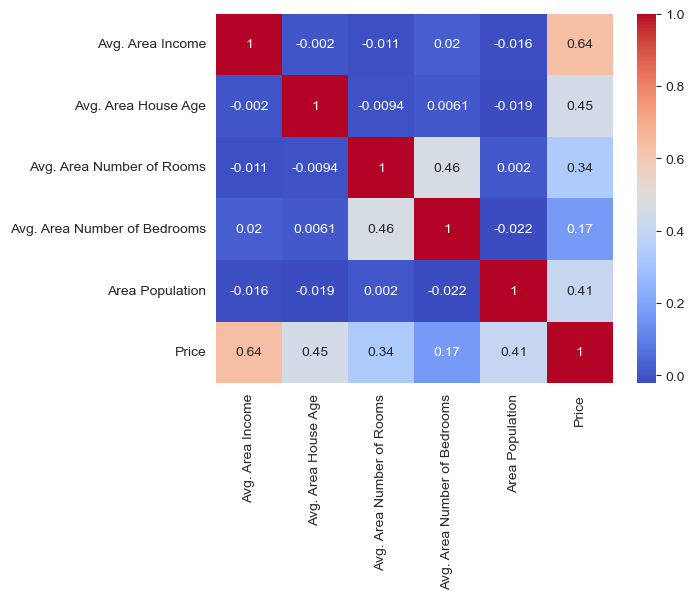

(5000, 7) (4000, 1) (1000, 1) (4000,) (1000,)
-198109.9881140045
[20.86775228]
Coefficient of Determination: 0.4378692217221959(model1)
Model 2 Coefficient of Determination 0.9215935236936301
MAE: 82494.73770125465(model2)
MAE: 10543597313.625547(model2)


In [33]:
# Place your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('USA_Housing.csv')

df.shape # 5000 rows, 7 columns
df.head(7)
df.describe()

# Basic style and formatting of charts
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.ticklabel_format(style='plain', axis='y') # Gets rid of scientific notation
plt.ticklabel_format(style='plain', axis='x') # Gets rid of scientific notation

# Step 3
sns.scatterplot(x="Avg. Area Income", y="Price", data=df)
plt.xlabel("Independent Var")
plt.ylabel("Dependent Var")
plt.show()

# Task 4, shows a normal distribution
sns.kdeplot(data=df, x="Price")
plt.show()

# Task 5, we exclude the address column, another method is to just do .drop of the address on the dataframe
sns.heatmap(df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population','Price']].corr(),
            annot=True, cmap="coolwarm")
plt.show()

# Task 6 
# From the heat map we can see my original choice of Avg. Area Income was a good choice as it has a strong correlation with price.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate the dependent and independent variables
X = df['Avg. Area Income'].values.reshape(-1,1) # Reshape as we only have 1 feature
y = df['Price']

# Splitting the data into training and testing sets for a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(df.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# fit the model
# If fit_intercept=True, the y-intercept will be determined by the line of best fit.
model = LinearRegression(fit_intercept=True)
lm1 = model.fit(X_train, y_train)

y_pred = lm1.predict(X_test)

# Task 7 print regression analysis coefficents
print(lm1.intercept_) # point at y axis where x axis is = 0
print(lm1.coef_) # slope , for every unit change of independent var, we have 20 units increase in price.

# Task 8 Evaluate your analysis through the Mean Absolute Error, the Root Mean Squared Error and the Coefficient of Determination.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred) # 43.7 percent is explained by our regression model
print(f"Coefficient of Determination: {r2}(model1)")

# Create a multi feature model (minus address column) EXCERSIZE 2
df1 = df.drop(columns=['Address'])
X1 = df1.drop(columns=['Price'])

X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size=0.2, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Model 2 Coefficient of Determination {r2}") # In our new model is what much better r2 at 92%

print(f"MAE: {mean_absolute_error(y_test, y_pred)}(model2)")
print(f"MAE: {mean_squared_error(y_test, y_pred)}(model2)") # TO get root mean squared just do srt of it


# Background: Residuals
A __residual__ is a measure of __how far away__ a point is __vertically__ from the __regression line__. Otherwise, it is the __error__ between a __predicted__ and the __observed value__ : 
$e_i = y_i - \hat{y}_i$

The __most important__ assumption of a linear regression model is that the __errors are independent and normally distributed__.

The __characteristics__ of a __good__ resudual plot are:
1. It has a __high density__ of points __close to the origin__ and a __low density__ of points __away from the origin__.
1. It is __symmetric__ about the origin.

The __[seaborn.displot()](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)__ provides access to several approaches for visualizing the __univariate__ or __bivariate__ distribution of data. The __kind__ parameter selects the approach to use:
1. Plot a __histogram__ of binned counts with optional normalization or smoothing: ```histplot()``` (with ```kind="hist"``` / default)
1. Plot univariate or bivariate distributions using __kernel density estimation__: ```kdeplot()``` (with ```kind="kde"```)
1. Plot __empirical cumulative distribution functions__: ```ecdfplot()``` (with ```kind="ecdf"``` / univariate only)

The __data__ parameter is used for the __input data__. It can be either a pandas.DataFrame, numpy.ndarray, mapping or sequence.

While in __histogram mode__, it is also possible to __add a KDE curve__:
```python
sns.displot((y_test-predictions),kde=True)
```
It will result in the following Figure:
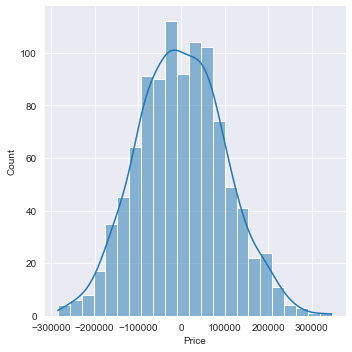

# Exercise 2: Multiple Regression Analysis
Now repeat the same analysis by inserting in your analysis all the available predictors. Use the same evaluation metrics to decide whether your new model is better than the previous one. What about the residuals?

In [34]:
"""
DID THIS IN EXCERSIZE 1 CELL (at the end model 2)
"""

'\nDID THIS IN EXCERSIZE 1 CELL (at the end)\n'

# Background: Detect Missing Values
1. The ```df.isna()``` __detects__ missing values. It returns a boolean same-sized object indicating if the values are NA. 
NA values such as __None__ or __numpy.Nan__, get mapped to __True__ values.
Everything else gets mapped to __False__ values. Characters such as empty strings __''__ or __numpy.inf__ are not considered __NA values__.
1. The ```df.isna().sum()``` returns the columns in our Pandas DataFrame along with the __number of missing values__ detected in __each one__.

# Background: Transformation of Categorical Variables
Since machine learning models can __take only numeric values__, we need to __replace__ the __categorical string values__ with __numeric values__:
```python
# Define a mapping of categorical values to numeric values
sex_mapping={'female':0,'male':1}
# Replace the categorical variables with the numeric ones
df['sex']=df['sex'].replace(sex_mapping)
```

# Background: Scaling the data
Prior to the application of a machine learning algorithm, it is a __good practice__ to __scale the data__ and bring them to the __same range__.

We will use the __[StandardScaler method](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)__ for that:
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
```

# Exercise 3:
In this exercise you have to load to your Jupyter Notebook the file __'insurance.csv'__. You will use the __'expenses'__ as the __dependent variable/outcome__ and all the others will be your predictors. Try different polynomial models by changing the order of the polynomial from 2 to 6. Which one performs better? Justify your reply based on evaluation metrics computed on both training and test set.

__Hint__: As Polynomial Regression is based on __Linear Regression__, we need to import both LinearRegression and Polynomial Features methods:
1. The first step is to call the PolynomialFeatures method with the degree of power.
1. Transform the train and test data and fit them into the PolynomialFeatures method.
1. Then, use the input and output variables for training through the Linear Regression method.

In [57]:
# Place your code here
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv('insurance.csv')

# We need to encode the text features to a numerical value this is called label encoding.
sex_mapping = {'female':0, 'male':1} # Would do this for every category
smoker_mapping = {'yes': 0, 'no': 1} # Make sure the values are exactly how they are in the df
region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}

# Replace categoricla values with numerical
df['sex'] = df['sex'].replace(sex_mapping)
df['smoker'] = df['smoker'].replace(smoker_mapping)
df['region'] = df['region'].replace(region_mapping)

df.head()

# Check for missing values
df.isna().sum()

# Create train test set
X = df.drop(columns=['expenses']) # Indenpendent vars
y = df['expenses'] # Dependent var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# sdtanardization process
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

poly = PolynomialFeatures(degree=6) # Try changing the degree value (2 or 3 is best as you can see)

X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)

poly.fit(X_poly_train, y_train)

lm3 = LinearRegression()
lm3.fit(X_poly_train, y_train)

y_pred = lm3.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
print(f"The coefficient of determination is: {r2}") # As degree changes this will change

# degree for 6 should give r2 score of -1 might be missing some small line of code (ask christos by email)


The coefficient of determination is: -21966464376516.72


# References
__[seaborn](https://seaborn.pydata.org/)__
<br>
__[User Guide](https://seaborn.pydata.org/tutorial.html)__
<br>
__[seaborn.set_style(style,rc)](https://seaborn.pydata.org/generated/seaborn.set_style.html)__
<br>
__[seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)__ 
<br>
__[pandas.DataFrame.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)__
<br>
__[seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)__
<br>
__[seaborn.displot()](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)__
<br>
__[StandardScaler method](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)__ 

Please visit the following link for __[Workshop 3 Evaluation](https://app.wooclap.com/PIHHOO?from=event-page)__
<br>
Tell us your opinion about this workshop and how we could become better in the next one.
<br>
__Your opinion matters!!!__)__
<br>
Tell us your opinion about this workshop and how we could become better in the next one.
<br>
__Your opinion matters!!!__